# CatBoost
--------

[https://catboost.ai/](https://catboost.ai/)

> Not only does it build one of the most accurate model on whatever dataset you feed it with — requiring minimal data prep — **CatBoost** also gives by far the best open source interpretation tools available today AND a way to productionize your model fast.

> That’s why **CatBoost** is revolutionising the game of *Machine Learning*, forever. And that’s why learning to use it is a fantastic opportunity to up-skill and remain relevant as a *data scientist*. 

```python
class MetricVisualizer(train_dirs,
                       subdirs=False)
```

<img src="data/catboost.png" alt="drawing" width="600mm"/> 


```python                       
import shap

shap_values = model.get_feature_importance(Pool(X, y), type='ShapValues')

expected_value = shap_values[0,-1]
shap_values = shap_values[:,:-1]

shap.summary_plot(shap_values, X)
```

<img src="data/shap.png" alt="drawing" style="background-color:white;" width="600mm"/>

# TIPS
----
- **Data pre-processing**

  - **Normalization:** 
> Normalization / Scaling (often used interchangeably with standardization) is used to transform the actual values of numeric variables in a way that provides helpful properties for machine learning. Many algorithms such as Logistic Regression, Support Vector Machine, K Nearest Neighbors and Naive Bayes assume that all features are centered around zero and have variances that are at at the same level of order. If a particular feature in a dataset has a variance that is larger in order of magnitude than other features, the model may not understand all features correctly and could perform poorly.

  - **Transformation:** 
> While normalization transforms the range of data to remove the impact of magnitude in variance, transformation is a more radical technique as it changes the shape of the distribution so that transformed data can be represented by a normal or approximate normal distirbution. In general, you should transform the data if using algorithms that assume normality or a gaussian distribution. Examples of such models are Logistic Regression, Linear Discriminant Analysis (LDA) and Gaussian Naive Bayes. (Pro tip: any method with “Gaussian” in the name probably assumes normality.)

  - **Ignore Low Variance:** 
> Datasets can sometimes contain categorical features that have a single unique or small number of values across samples. This kind of features are not only non-informative and add no value but are also sometimes harmful for few algorithms.

  - **Multi-collinearity:** 
> Multi-collinearity is a state of very high intercorrelations or inter-associations among the independent features in the dataset. It is a type of disturbance in the data that is not handled well by machine learning models (mostly linear algorithms). Multi-collinearity may reduce overall coefficient of the model and cause unpredictable variance. This will lead to overfitting where the model may do great on a known training set but will fail with an unknown testing set.

  - **Group Features:** 
> Sometimes datasets may contain features that are related at a sample level. Such features can be used to extract additional features based on the statistical properties of the distribution such as mean, median, variance, standard deviation etc.

  - **Bin Numeric Variables:** 
> Binning or discretization is the process of transforming numerical variables into categorical features. An example would be the Age variable which is a continious distribution of numeric values that can be discretized into intervals (10-20 years, 21-30 etc.). Binning may improve the accuracy of a predictive model by reducing the noise or non-linearity in the data. (Sturges rule: data should be split into $k$ equally spaced classes where $k = ceil(1+\log _{2}N)$)

  - **Model Ensembling and Stacking:** 
> Ensemble modeling is a process where multiple diverse models are created to predict an outcome. This is achieved either by using many different modeling algorithms or using different samples of training data sets. The ensemble model then aggregates the predictions of each base model resulting in one final prediction for the unseen data. The motivation for using ensemble models is to reduce the generalization error of the prediction. As long as the base models are diverse and independent, the prediction error of the model decreases when the ensemble approach is used. The two most common methods in ensemble learning are `Bagging` and `Boosting`. Stacking is also a type of ensemble learning where predictions from multiple models are used as input features for a meta model that predicts the final outcome.

  - **Tuning Hyperparameters of Ensemblers:** 
> Similar to hyperparameter tuning for a single machine learning model.

-----
- **Features from _DatePart_**

> One-hot encoding on the month is a good idea but it is a bit rigid. Indeed the value of each feature is going to be 0 or 1, depending on the month of each observation. We're basically saying that the month of September is as distant to the month of August as it is to the month of March. Of course this isn't true, and it would be nice if our features would reflect this. To do so we can simply calculate the distance between the month of each observation and all the months in the calendar. Instead of simply computing the distance linearly, we're going to use a so-called *Gaussian radial basic function kernel*. This computes a similarity between two months -- denoted by $i$ and $j$ -- which decreases the further apart they are from each other. The $sigma$ parameter can be seen as a hyperparameter than can be tuned.

$$d(i, j) = exp(-\frac{(i - j)^2}{2\sigma^2})$$
or 

$$d(i, j) = exp(-\frac{\text{min}(|i - j|, N - |i - j|)^2}{2\sigma^2})$$ 
with $N = 12$ for months and $N = 7$ for days.

-----
- **running Statistics**

> The simple fact that we are getting the data in a stream means that we can't do a lot of things the same way as in a batch setting. For example let's say we want to scale the data so that it has mean 0 and variance 1, as we did earlier. To do so we simply have to subtract the mean of each feature to each value and then divide the result by the standard deviation of the feature. The problem is that we can't possible known the values of the mean and the standard deviation before actually going through all the data! The way we do feature scaling involves computing *running statistics*. The idea is that we use a data structure that estimates the mean and updates itself when it is provided with a value. The same goes for the variance (and thus the standard deviation). For example, if we denote $\mu_t$ the mean, $n_t$ the count, $s_t$ the running sum of squares and $\sigma_t$ the running variance at any moment $t$, then updating can be done as so:

$$
\begin{cases}
n_{t+1} = n_t + 1 \\
\mu_{t+1} = \mu_t + \frac{x - \mu_t}{n_{t+1}} \\
s_{t+1} = s_t + (x - \mu_t) \times (x - \mu_{t+1}) \\
\sigma_{t+1} = \frac{s_{t+1}}{n_{t+1}}
\end{cases}
$$

-----
- **Apriori**

```python
from apyori import apriori
rules = apriori(data, 
                min_support = 0.0001, 
                min_confidence = 0.5, 
                min_lift = 3, 
                min_length = 2,
                max_length = 10)
rules = list(rules)
```

data = [ transaction$_1$, transaction$_2 \dots$, transaction$_n$] 

where transaction$_i$ = [ product$_1$, product$_2 \dots$, product$_n$ ]


-----
- **logging**

In [1]:
import logging
import sys
logging.basicConfig(format='%(asctime)s | %(levelname)s : %(message)s',
                     level=logging.INFO, stream=sys.stdout)
logging.info('Hello world!')

2020-07-20 16:41:46,329 | INFO : Hello world!


-----
- **ASCII**

In [2]:
import string
print("ord(a) =", ord('a'))
print("chr(97) =",chr(97))
print(string.ascii_lowercase)
print(string.ascii_uppercase)
print(list(map(chr, range(97, 123))))
print(list(map(chr, range(65, 91))))

ord(a) = 97
chr(97) = a
abcdefghijklmnopqrstuvwxyz
ABCDEFGHIJKLMNOPQRSTUVWXYZ
['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


# GCP 
-----

## AI Platform

Before you can deploy your model for serving, AI Platform needs access to the following files in Cloud Storage:

* `model.joblib` (model artifact)
* `preprocessor.pkl` (model artifact)
* `my_custom_code-0.1.tar.gz` (custom code)

Model artifacts must be stored together in a model directory, which your Predictor can access as `model_dir` argument in its `from_path` class method. The custom code does not need to be in the same directory.

```python 
# predictor.py

import os
import pickle

import numpy as np
from sklearn.datasets import load_iris
from sklearn.externals import joblib

class MyPredictor(object):
    def __init__(self, model, preprocessor):
        self._model = model
        self._preprocessor = preprocessor
        self._class_names = [..., ...]

    def predict(self, instances, **kwargs):
        inputs = np.asarray(instances)
        preprocessed_inputs = self._preprocessor.preprocess(inputs)
        if kwargs.get('probabilities'):
            probabilities = self._model.predict_proba(preprocessed_inputs)
            return probabilities.tolist()
        else:
            outputs = self._model.predict(preprocessed_inputs)
            return [self._class_names[class_num] for class_num in outputs]

    @classmethod
    def from_path(cls, model_dir):
        model_path = os.path.join(model_dir, 'model.joblib')
        model = joblib.load(model_path)

        preprocessor_path = os.path.join(model_dir, 'preprocessor.pkl')
        with open(preprocessor_path, 'rb') as f:
            preprocessor = pickle.load(f)

        return cls(model, preprocessor)
```

```bash
MODEL_NAME = 'Predictor'
VERSION_NAME = 'v1'
! gcloud ai-platform models create $MODEL_NAME \
  --regions $REGION
# --quiet automatically installs the beta component if it isn't already installed 
! gcloud --quiet beta ai-platform versions create $VERSION_NAME \
  --model $MODEL_NAME \
  --runtime-version 1.13 \
  --python-version 3.5 \
  --origin gs://$BUCKET_NAME/.../model/ \
  --package-uris gs://$BUCKET_NAME/.../my_custom_code-0.1.tar.gz \
  --prediction-class predictor.MyPredictor
```

```python
import googleapiclient.discovery

instances = [
  [ ],
  [ ],
]

service = googleapiclient.discovery.build('ml', 'v1')
name = 'projects/{}/models/{}/versions/{}'.format(PROJECT_ID, MODEL_NAME, VERSION_NAME)

response = service.projects().predict(
    name=name,
    body={'instances': instances} #, 'probabilities': True
).execute()

if 'error' in response:
    raise RuntimeError(response['error'])
else:
    print(response['predictions'])

```

## BigQuery ML

In [3]:
# logistic regression
import pandas as pd
df = pd.read_csv('data/bigqueryml.csv')
df.head()

,key,proba
0,8bc0fa99cad0977549c20999af190285,0.015562
1,2a822b0cf8c5555c692a0771d3bf2464,0.019358
2,39bbc7eebdc7ef757fa18a6afd27448f,0.009329
3,0ed44fc0f3125b5b2ab4273d32d196ea,0.006009
4,0c699260585e04a11ffa484e65a02fa8,0.008650


In [4]:
df = df.sort_values(by='proba', ascending=False)
df.drop_duplicates('key', inplace=True)
df.shape

(9999, 2)

In [5]:
data = df.proba.cumsum().reset_index(drop=True)
data.head()

0    0.978062
1    1.798625
2    2.533630
3    3.261560
4    3.982085
Name: proba, dtype: float64

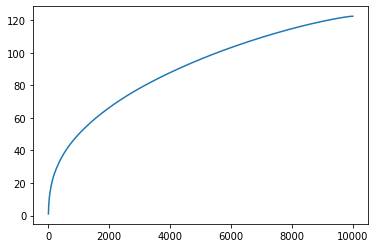

In [6]:
%matplotlib inline
data.plot()

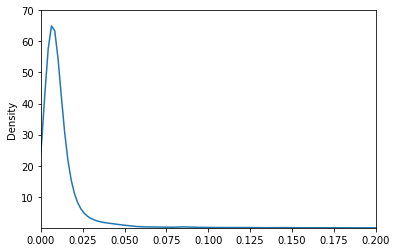

In [7]:
df.proba.plot(kind='density',xlim=(0,0.2), ylim=(0.01,70), logy=False)

In [8]:
from sklearn import preprocessing
x = df[['proba']].cumsum().values.astype(float)
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_normalized = pd.DataFrame(x_scaled)

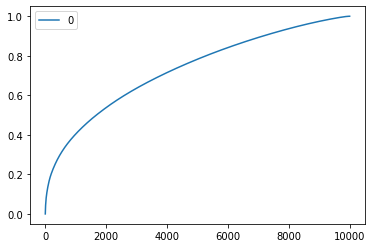

In [9]:
df_normalized.plot()

**LINEAR OR LOGISTIC REGRESSION**

```sql
%load_ext google.cloud.bigquery

%%bigquery --project dmp-y-tests
CREATE OR REPLACE MODEL
  `project.ml.model`
OPTIONS
  ( model_type='logistic_reg', -- OR "linear_reg"
    input_label_cols=['Target'],
    learn_rate_strategy="line_search",
    ls_init_learn_rate=.15,
    -- learn_rate_strategy="constant",
    -- learn_rate=0.1,
    max_iterations=100,
    data_split_method='random',
    data_split_eval_fraction=0.3,
    l1_reg=0.05,
    l2_reg=0.05,
    early_stop=False,
    warm_start=False) AS
SELECT * FROM `project.ml.train`;

%%bigquery --project project
SELECT * FROM ML.EVALUATE(MODEL `project.ml.model`, TABLE `project.ml.train`;

%%bigquery --project project roc
SELECT * FROM ML.ROC_CURVE(MODEL `project.ml.model`, TABLE `project.ml.train`);

%%bigquery --project project params
SELECT * FROM ML.WEIGHTS(MODEL `project.ml.model`);

%%bigquery --project project                          
SELECT * FROM ML.EVALUATE(MODEL `project.ml.model`, TABLE `project.validation`);

%%bigquery --project project results
SELECT * FROM ML.PREDICT(MODEL `project.ml.model`, TABLE ml.test);
```

**MATRIX_FACTORIZATION**

```sql
{CREATE MODEL | CREATE MODEL IF NOT EXISTS | CREATE OR REPLACE MODEL}
model_name
OPTIONS(MODEL_TYPE = 'MATRIX_FACTORIZATION'
[, FEEDBACK_TYPE = {'EXPLICIT' | 'IMPLICIT'} ]
[, NUM_FACTORS = int64_value ]
[, USER_COL = string_value ]
[, ITEM_COL = string_value ]
[, RATING_COL = string_value ]
[, WALS_ALPHA = float64_value ]
[, L2_REG = float64_value ]
[, MAX_ITERATIONS = int64_value ]
[, EARLY_STOP = { TRUE | FALSE } ]
[, MIN_REL_PROGRESS = float64_value ]
[, DATA_SPLIT_METHOD = { 'AUTO_SPLIT' | 'RANDOM' | 'CUSTOM' | 'SEQ' | 'NO_SPLIT' } ]
[, DATA_SPLIT_EVAL_FRACTION = float64_value ]
[, DATA_SPLIT_COL = string_value ])
AS query_statement
```

## Google Maps API

In [10]:
import argparse
import googlemaps

API_KEY = 'xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx'

def gmaps(address):
    geocode_result = googlemaps.Client(key=API_KEY).geocode(address=address)
    print(geocode_result)

In [11]:
gmaps("Facebook Paris")

[{'address_components': [{'long_name': '6', 'short_name': '6', 'types': ['street_number']}, {'long_name': 'Rue Ménars', 'short_name': 'Rue Ménars', 'types': ['route']}, {'long_name': 'Paris', 'short_name': 'Paris', 'types': ['locality', 'political']}, {'long_name': 'Arrondissement de Paris', 'short_name': 'Arrondissement de Paris', 'types': ['administrative_area_level_2', 'political']}, {'long_name': 'Île-de-France', 'short_name': 'IDF', 'types': ['administrative_area_level_1', 'political']}, {'long_name': 'France', 'short_name': 'FR', 'types': ['country', 'political']}, {'long_name': '75002', 'short_name': '75002', 'types': ['postal_code']}], 'formatted_address': '6 Rue Ménars, 75002 Paris, France', 'geometry': {'location': {'lat': 48.8697986, 'lng': 2.3378816}, 'location_type': 'ROOFTOP', 'viewport': {'northeast': {'lat': 48.8711475802915, 'lng': 2.339230580291502}, 'southwest': {'lat': 48.8684496197085, 'lng': 2.336532619708498}}}, 'place_id': 'ChIJg4IjpTtu5kcRozwTN4YMcSQ', 'plus_co

# Genetic Algorithms
------------------

> 1. Initialization

> 2. Selection (fitness function)

> 3. Genetic operators (crossover/recombination and mutation)

> 4. Back to 2. until Termination

In [12]:
import functools
from random import randint, random
from operator import add

In [13]:
def individual(length, min, max):
    return [ randint(min,max) for x in range(length) ]

In [14]:
def population(count, length, min, max):
    return [ individual(length, min, max) for x in range(count) ]

In [15]:
def fitness(individual, target):
    sum = functools.reduce(add, individual, 0)
    return abs(target-sum)

In [16]:
def grade(pop, target):
    summed = functools.reduce(add, (fitness(x, target) for x in pop), 0)
    return summed / (len(pop) * 1.0)

In [17]:
def evolve(pop, target, retain=0.2, random_select=0.05, mutate=0.01):
    graded = [ (fitness(x, target), x) for x in pop]
    graded = [ x[1] for x in sorted(graded)]
    retain_length = int(len(graded)*retain)
    parents = graded[:retain_length]
    for individual in graded[retain_length:]:
        if random_select > random():
            parents.append(individual)
    for individual in parents:
        if mutate > random():
            pos_to_mutate = randint(0, len(individual)-1)
            individual[pos_to_mutate] = randint(
                min(individual), max(individual))
    parents_length = len(parents)
    desired_length = len(pop) - parents_length
    children = []
    while len(children) < desired_length:
        male = randint(0, parents_length-1)
        female = randint(0, parents_length-1)
        if male != female:
            male = parents[male]
            female = parents[female]
            half = int(len(male) / 2)
            child = male[:half] + female[half:]
            children.append(child)

    parents.extend(children)
    return parents

In [18]:
target = 467
p_count = 100
i_length = 6
i_min = 0
i_max = 100
p = population(p_count, i_length, i_min, i_max)
fitness_history = [grade(p, target),]
for i in range(29):
    p = evolve(p, target)
    fitness_history.append(grade(p, target))
print(fitness_history)

[169.59, 96.73, 40.68, 25.08, 10.88, 6.94, 6.0, 6.0, 6.0, 6.0, 6.0, 6.12, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.05, 6.0, 6.0, 6.0, 6.55, 6.0, 6.0, 6.0, 6.0, 6.0]


# pool.map
--------

In [19]:
import multiprocessing
def f(i):
    return i**0.5

In [20]:
%%time
r = []
for i in range(1, 200000000):
    r.append(f(i))
print(type(r))
del r

<class 'list'>
CPU times: user 49.8 s, sys: 1.86 s, total: 51.7 s
Wall time: 51.7 s


In [21]:
%%time
r = map(f, range(1,200000000))
print(type(r))
_ = list(r)
del r

<class 'map'>
CPU times: user 31.1 s, sys: 1.37 s, total: 32.5 s
Wall time: 32.5 s


In [22]:
%%time
pool = multiprocessing.Pool(7)
r = pool.map(f, range(1,200000000), chunksize=20000)
print(type(r))
pool.close()
pool.join()
del r

<class 'list'>
CPU times: user 29.1 s, sys: 4.54 s, total: 33.6 s
Wall time: 34 s


In [38]:
def a(x, y, z):
    return x*y*z
def b(args, x):
    y, z = args
    return a(x, y, z)

In [39]:
import multiprocessing
from functools import partial
pool = multiprocessing.Pool()
r = pool.map(partial(b,(10, 10)), range(10))
pool.close()
pool.join()
r

[0, 100, 200, 300, 400, 500, 600, 700, 800, 900]

# User Agent
------------

In [25]:
from ua_parser import user_agent_parser

In [26]:
examples = [
    'Mozilla/5.0 (Windows NT 10.0; WOW64; Trident/7.0; sYqizbDC-45; rv:11.0) like Gecko',
    'Mozilla/5.0 (iPhone; CPU iPhone OS 13_1_3 like Mac OS X) AppleWebKit/605.1.15 (KHTML, like Gecko) Mobile/15E148 imoiPhone/2019.11.0216; (iPhone9,3; U; iPhone OS 13.1.3)',
    'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/80.0.3987.16 Safari/537.36 Edg/80.0.361.14',
    'Mozilla/5.0 (Linux armv7l) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/53.0.2785.143 Safari/537.36 OPR/40.0.2207.0 OMI/4.9.0.237.DOM3.217 Model/Vestel-MB130 VSTVB MB100 HbbTV/1.2.1 (; ESSENTIELB; MB130; 3.62.24.0; _TV_G10_2017;) SmartTvA/3.0.0',
    'Mozilla/5.0 (Linux; Android 9; SM-G950F Build/PPR1.180610.011; wv) AppleWebKit/537.36 (KHTML, like Gecko) Version/4.0 Chrome/78.0.3904.108 Mobile Safari/537.36 Line/9.22.1/IAB',
    'Opera/9.80 (Windows NT 6.1) Presto/2.12.388 Version/12.15',
    'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_0) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/77.0.3865.120 Safari/537.36 OPR/64.0.3417.92',
    'Mozilla/5.0 (Windows NT 6.2; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/80.0.3987.122 Safari/537.36 SECSSOBrowserChrome',
    'Mozilla/5.0 (Linux; Android 8.1.0; Redmi Note 6 Pro Build/OPM1.171019.011; wv) AppleWebKit/537.36 (KHTML, like Gecko) Version/4.0 Chrome/74.0.3729.112 Mobile Safari/537.36'
]

In [27]:
for example in examples:
    resp = user_agent_parser.Parse(example)
    print('%s ; %s, %s, %s'%(resp['user_agent']['family'], resp['device']['family'], resp['device']['brand'], resp['device']['model']))

IE ; Other, None, None
Mobile Safari UI/WKWebView ; iPhone, Apple, iPhone9,3
Edge ; Other, None, None
HbbTV ; HbbTV, ESSENTIELB, MB130
LINE ; Samsung SM-G950F, Samsung, SM-G950F
Opera ; Other, None, None
Opera ; Mac, Apple, Mac
Chrome ; Other, None, None
Chrome Mobile WebView ; XiaoMi Redmi Note 6 Pro, XiaoMi, Redmi Note 6 Pro


# Iterators
-----------

In [28]:
import itertools
def sqr(n):
    return n*n

In [29]:
for i in map(sqr, itertools.count(start=23)):
    if i > 1000:
        break
    print(i)

529
576
625
676
729
784
841
900
961


In [30]:
a = 'ABCDEFGH'
print(list(zip(a, itertools.cycle(range(3)))))

[('A', 0), ('B', 1), ('C', 2), ('D', 0), ('E', 1), ('F', 2), ('G', 0), ('H', 1)]


In [31]:
a = 'ABCD'
b = ['E', 'F', 'G', 'H']
print(list(itertools.chain(a,b)))

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']


In [32]:
def compute_sqr_sum(x, y):
    return x**2 + y**2

a = [(x,x+1) for x in range(4)]
print(list(itertools.starmap(compute_sqr_sum, a)))

[1, 5, 13, 25]


In [33]:
a = [1, 2, 3]
print(list(itertools.product(a,repeat=2)))

[(1, 1), (1, 2), (1, 3), (2, 1), (2, 2), (2, 3), (3, 1), (3, 2), (3, 3)]


In [34]:
gen = itertools.count()
print(list(itertools.islice(gen, 2, 5)))

[2, 3, 4]


In [35]:
import operator

gen = itertools.count(1)

factorials = itertools.accumulate(itertools.count(1), func=operator.mul)

fac_and_nums = zip(gen, factorials)

print(list(itertools.islice(fac_and_nums, 1, 5)))

[(2, 2), (3, 6), (4, 24), (5, 120)]


By the way, you have to be careful when using *iterators*, since they get incremented every time the **next()** function is called on them.

# ❤️
---

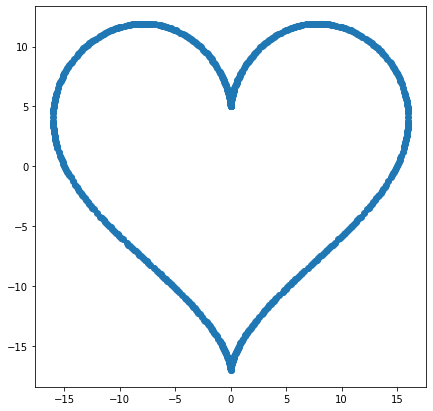

In [36]:
%matplotlib inline
import matplotlib.pyplot as plt
from math import cos, sin
x = [16 * pow(sin(t), 3) for t in range (-314,314)]
y = [13 * cos(t) - 5 * cos(2*t) - 2 * cos(3*t) - cos(4*t) for t in range (-314,314)]
plt.rcParams['figure.figsize'] = [7, 7]
plt.scatter(x,y,)
plt.show()